In [1]:
import sys
sys.path.append('/root/userspace/assignment/dl4us/src')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from time import time

import dataset
from cluster import Cluster, AutoEncoder
from dec import DEC
from vade import VaDE

# MNIST

In [2]:
x_train, y_train = dataset.load('mnist')
print('Shape of x_train:', x_train.shape)
print('Shape of y_train:', y_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
Shape of x_train: (70000, 28, 28, 1)
Shape of y_train: (70000,)


## k-means

In [3]:
kmeans = Cluster()
scores = kmeans.fit(x_train.reshape((len(x_train), -1)), y_train, verbose=0)
scores

{'acc': 0.5343571428571429,
 'nmi': 0.4996688297640672,
 'ari': 0.3662999101677368}

## AutoEncoder + k-means

In [4]:
autoencoder = AutoEncoder()
scores = autoencoder.fit(x_train.reshape((len(x_train), -1)), y_train, verbose=0)
scores

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


{'acc': 0.6818142857142857, 'nmi': 0.6914330889379637, 'ari': 0.59804043830252}

## DEC

In [5]:
dec = DEC(dims=(784, 500, 500, 2000, 10), pretrain_epochs=300)
scores = dec.fit(x_train.reshape((len(x_train), -1)), y_train, verbose=0)
scores

Instructions for updating:
Use tf.cast instead.


{'acc': 0.9512, 'nmi': 0.8913192337444124, 'ari': 0.8978889175983287}

## VaDE

In [6]:
vade = VaDE(
    n_clusters=10, input_dim = 784, hidden_dim = [500, 500, 2000], latent_dim = 10,
    act='relu', epochs=100, pretrain_epochs=100, batch_size=200, lr=0.002,
)
scores = vade.fit(x_train.reshape((len(x_train), -1)), y_train, verbose=0)
scores

{'acc': 0.9422, 'nmi': 0.8760381387874957, 'ari': 0.8767131864399449}

## Visualization

In [20]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
#import seaborn as sns

classes = [i for i in range(10)]

def plot_confusion_matrix(cm, classes):
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    #plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

[[   9    2   41 5054  290    4 1244    7   79  173]
 [  10 4293    6    0    8 3527    7   10    9    7]
 [4862  425  215   57  320  435  247   79  201  149]
 [ 207  457  190   21 4578   54  485   46 1071   32]
 [  29  181 3739    9    0  225  285 2171   16  169]
 [   7  161  423   60 2109  260 1846  207 1170   70]
 [  58  200   68   75   38   43 1943    4   17 4430]
 [  53  376 2087   21    5  310   13 4404   20    4]
 [  53  338  209   37 1172  315  353  188 4107   53]
 [  20  267 3456   50   86   92   30 2852   89   16]]


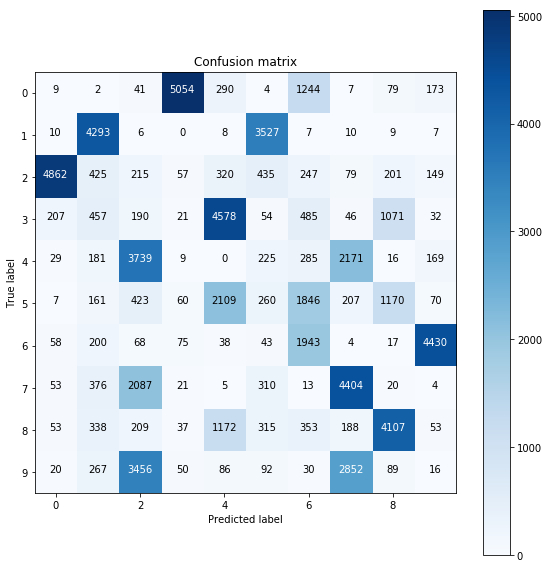

In [21]:
y_pred = kmeans.predict(x_train.reshape((len(x_train), -1)))

cnf_matrix = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes)

[[   7   15   90    0   10    1   34 6730   14    2]
 [   4    1    3    9  400   16   12    1 7422    9]
 [ 118   83    7    4 6432    2    5  188   96   55]
 [  32 6630    9    6  112   20  148   46   68   70]
 [   1    5   66 3189   89 3213   39   39  165   18]
 [   8  421  141    7   21   30 5493  144   35   13]
 [  15   50 5938    2  129    9  209  381  143    0]
 [   0   29    0   64  242  214   26   66  156 6496]
 [4875  603   30   86  463   59  502   58  106   43]
 [  23  129    3 2970   21 2765   27   78  110  832]]


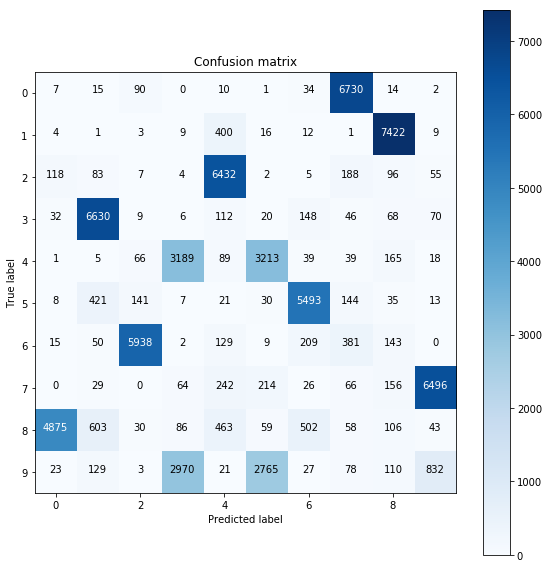

In [22]:
y_pred = autoencoder.predict(x_train.reshape((len(x_train), -1)))

cnf_matrix = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes)

[[  29   30    3    9    5    7    0 6813    6    1]
 [   4   36   21   91    7   19 7663    1   15   20]
 [  19   69   38 6721    2    4    6   32   53   46]
 [   6   62 6799  112   91   20    3    2    2   44]
 [  36    8    0   21    0  155    3    4 6595    2]
 [  38   17   79    9 6095   38    3   27    6    1]
 [6642    7    2    6  164    0   10   31   14    0]
 [   0    4    5  100    2  121   29    6   39 6987]
 [  12 6488   69   39   69   85   20   18   20    5]
 [   5   55  122   11   16 5781    6   20  849   93]]


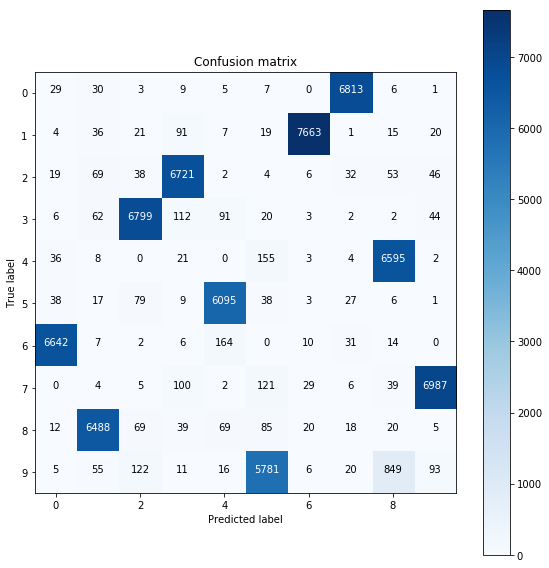

In [23]:
y_pred = dec.predict(x_train.reshape((len(x_train), -1)))

cnf_matrix = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes)

[[  19    1   49    0    0   12    9   79 6733    1]
 [   2   32    4 7550   22   12    1  225    4   25]
 [   2   26    0    0    2   32   18 6903    2    5]
 [ 165   17    3    0    9   74 6698  172    3    0]
 [   1    7    4    0  143    3    0   47    0 6619]
 [6112    1   13    0    4   18   96   48   18    3]
 [ 253    0 6350    3    0   35    1  195   30    9]
 [  15 6699    0    2  124    8    1  328    6  110]
 [ 198   11    6    2   27 6242  134  160   10   35]
 [  40  140    0    1 6006   66   95   46    3  561]]


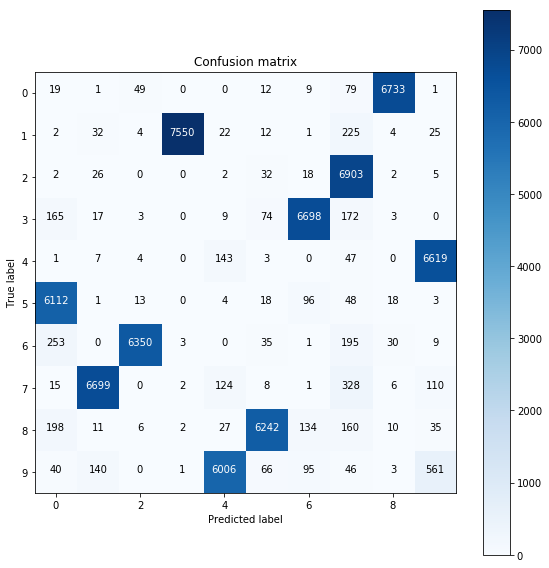

In [24]:
y_pred = vade.predict(x_train.reshape((len(x_train), -1)))

cnf_matrix = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes)

In [25]:
def plot_mnist(images, dim=(1,10), figsize=(12,2)):
    assert len(images) == 10, 'Images size must be 10.'
    plt.figure(figsize=figsize)
    for i in range(len(images)):
        plt.subplot(dim[0],dim[1],i+1)
        img = images[i,:,:, 0]
        plt.imshow(img, cmap='binary')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

## DEC

In [26]:
y_pred = dec.predict(x_train.reshape((len(x_train), -1)))

### 9 => 4に間違える

5781


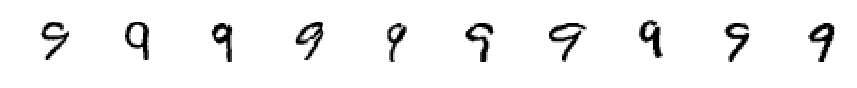

849


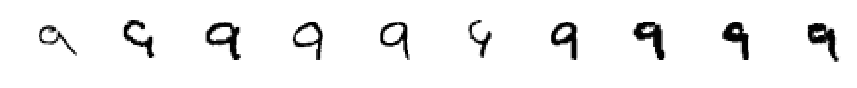

In [29]:
target = np.where((y_train == 9) & (y_pred == 5))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

target = np.where((y_train == 9) & (y_pred == 8))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

## VaDE

In [30]:
y_pred = vade.predict(x_train.reshape((len(x_train), -1)))

### 9 => 4に間違える

6027


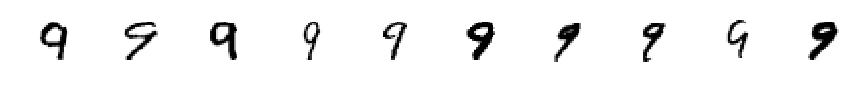

545


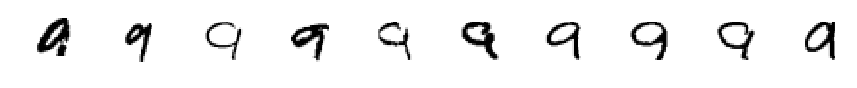

In [31]:
target = np.where((y_train == 9) & (y_pred == 4))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

target = np.where((y_train == 9) & (y_pred == 9))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

### 7 => 2に間違える

6704


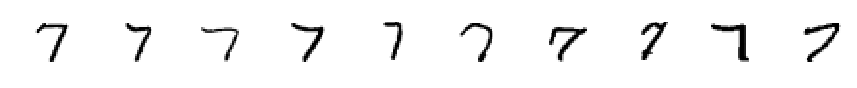

334


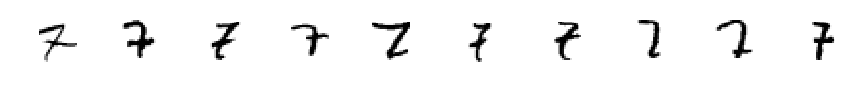

In [32]:
target = np.where((y_train == 7) & (y_pred == 1))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)

target = np.where((y_train == 7) & (y_pred == 7))
print(len(target[0]))
images = x_train[np.random.choice(target[0], 10, replace=False)]
plot_mnist(images)